---
---
# Previsão de Customer Churn em Operadoras de Telecom 
---
---

O objetivo deste projeto é prever o Customer Churn em uma Operadora de Telecom.  

Customer Churn (ou Rotatividade de Clientes, em uma tradução livre) refere-se a uma decisão tomada pelo cliente sobre o término do relacionamento comercial. Refere-se também à perda de clientes. A fidelidade do cliente e a rotatividade de clientes sempre somam 100%. Portanto, é muito importante para uma empresa prever os usuários que provavelmente abandonarão o relacionamento comercial e os fatores que afetam essas decisões.  

A proposta, então, é criar um modelo de aprendizagem de máquina que possa prever se um cliente irá ou não cancelar seu plano e qual a probabilidade de isso ocorrer. Os datasets de treino e de teste foram fornecidos pela Data Science Academy, em arquivos separados; o projeto faz parte da Formação Cientista de Dados.  

---


_Customer Churn Forecast in Telecom Operators_
---


_The objective of this project is to predict Customer Churn in a Telecom Operator._

_Customer Churn refers to a decision made by the customer about ending the business relationship. It also refers to the loss of customers. Customer loyalty and customer churn always add up to 100%. Therefore, it is very important for a company to predict the users who are likely to leave the business relationship and the factors that affect those decisions._

_The proposal then, is to create a machine learning model that can predict whether or not a customer will cancel their plan and how likely it is to do so. Train and test datasets were provided by Data Science Academy, in separate files; the project is part of the Data Scientist Training._

## Dicionário de Dados // _Data Dictionary_

**Coluna/_Column_**|**Tipo de dado/_Dtype_**      |**Descrição/_Description_**
:-------------|:------------------------:|:-------------------------
state (categorical)|String|Estado
account_length (numeric)|Int|Comprimento da conta
area_code (categorical)|Int|Código de área
international_plan (categorical)|String|Plano de ligações internacionais
voice_mail_plan (categorical)|String|Plano de mensagem de voz
number_vmail_messages (numeric)|Int|Número de mensagens via mail
total_day_minutes (numeric)|Int|Total de minutos durante o dia
total_day_calls (numeric)|Int|Total de ligações de dia
total_day_charge (numeric)|Float|Valor total devido pelas ligações durante o dia
total_eve_minutes (numeric)|Float|Total de minutos - véspera
total_eve_calls (numeric)|Int|Total de ligações - véspera
total_eve_charge (numeric)|Float|Valor total devido pelas ligações - véspera
total_night_minutes (numeric)|Int|Total de minutos durante a noite
total_night_calls (numeric)|Int|Total de ligações de noite
total_night_charge (numeric)|Float|Valor total devido pelas ligações durante a noite
total_intl_minutes (numeric)| Int|Total de minutos de ligações internacionais
total_intl_calls (numeric)|Int|Total de ligações internacionais
total_intl_charge (numeric)|Float|Valor total devido pelas ligações internacionais
number_customer_service_calls (numeric)|Int|Número de chamadas de atendimento ao cliente
churn (categorical)|Int|Rotatividade do cliente (yes - distrato, no - permanência)

## Análise Exploratória de Dados // _Exploratory Data Analysis - EDA_

In [1]:
# Versão da Linguagem Python // Python language version
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.12


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Versões dos pacotes usados neste jupyter notebook // Versions of packages used in this jupyter notebook
#!pip install -q -U watermark
%reload_ext watermark
%watermark -a "Tatiana Novaes Carvalho" --iversions

Author: Tatiana Novaes Carvalho

matplotlib: 3.5.1
numpy     : 1.22.3
seaborn   : 0.11.2
pandas    : 1.4.2



In [4]:
# Parâmetros de configuração dos gráficos // Graph configuration parameters
from matplotlib import rcParams

rcParams['figure.figsize'] = 20, 18
rcParams['lines.linewidth'] = 4
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

sns.set_style('darkgrid')

### Carga dos dados // _Data load_

In [5]:
# Carrega os dados // Load the data
arquivo = 'projeto4_telecom_treino'
df = pd.read_csv(f'datasets/{arquivo}.csv', index_col = 0)

In [6]:
df.shape

(3333, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 3333 non-null   int64  
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3333 non-null   int64  
 6   total_day_minutes              3333 non-null   float64
 7   total_day_calls                3333 non-null   int64  
 8   total_day_charge               3333 non-null   float64
 9   total_eve_minutes              3333 non-null   float64
 10  total_eve_calls                3333 non-null   int64  
 11  total_eve_charge               3333 non-null   float64
 12  total_night_minutes            3333 non-null   f

In [8]:
df.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [9]:
df.sample(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
2268,MS,29,area_code_510,no,no,0,313.2,103,53.24,216.3,151,18.39,218.4,106,9.83,12.8,4,3.46,2,yes
581,IN,113,area_code_415,no,no,0,209.4,151,35.60,347.3,113,29.52,246.0,116,11.07,7.4,2,2.00,1,yes
1592,IL,90,area_code_415,no,yes,29,185.6,106,31.55,219.7,113,18.67,152.1,120,6.84,11.1,5,3.00,2,no
2121,UT,81,area_code_510,no,no,0,154.5,84,26.27,216.2,91,18.38,229.8,82,10.34,13.7,3,3.70,1,no
2719,OK,84,area_code_510,no,no,0,203.4,125,34.58,182.9,88,15.55,213.7,121,9.62,13.8,2,3.73,1,no


In [10]:
df.tail(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
3329,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
3330,WV,68,area_code_415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
3331,RI,28,area_code_510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no
3332,CT,184,area_code_510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,no
3333,TN,74,area_code_415,no,yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,no


In [11]:
# Categorias por variável // Categories by variable

print(f'Total de Categorias por Variável:')
print()
for col in df.columns:
    print(f'{col}: {df[col].nunique()}')
    

Total de Categorias por Variável:

state: 51
account_length: 212
area_code: 3
international_plan: 2
voice_mail_plan: 2
number_vmail_messages: 46
total_day_minutes: 1667
total_day_calls: 119
total_day_charge: 1667
total_eve_minutes: 1611
total_eve_calls: 123
total_eve_charge: 1440
total_night_minutes: 1591
total_night_calls: 120
total_night_charge: 933
total_intl_minutes: 162
total_intl_calls: 21
total_intl_charge: 162
number_customer_service_calls: 10
churn: 2


### Separação das Variáveis Categóricas e Numéricas // _Separation of Categorical and Numerical Variables_

In [12]:
df.columns 

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [13]:
# Lista de colunas categóricas // List of categorical columns
cat_features = ['state',
                'area_code', 
                'international_plan', 
                'voice_mail_plan',
                ]

# Lista de colunas numéricas // List of numerical columns     
num_features = ['account_length', 'number_vmail_messages',
                'total_day_minutes', 'total_day_calls', 'total_day_charge',
                'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
                'total_night_minutes', 'total_night_calls', 'total_night_charge',
                'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
                'number_customer_service_calls',
                ]

# Variável-alvo // Target
target = ['churn']

In [14]:
# Conversão dos tipos de dados das variáveis // Conversion of variables data types

# Categóricas
for feat in cat_features:
    df[feat] = df[feat].astype('category')

# Numéricas
for feat in num_features:
    df[feat] = df[feat].astype('float64')

# Target
df[target] = df[target].astype('category')

In [15]:
# Tipos dos dados de cada variável após conversão // Data types of each variable after conversion
df.dtypes

state                            category
account_length                    float64
area_code                        category
international_plan               category
voice_mail_plan                  category
number_vmail_messages             float64
total_day_minutes                 float64
total_day_calls                   float64
total_day_charge                  float64
total_eve_minutes                 float64
total_eve_calls                   float64
total_eve_charge                  float64
total_night_minutes               float64
total_night_calls                 float64
total_night_charge                float64
total_intl_minutes                float64
total_intl_calls                  float64
total_intl_charge                 float64
number_customer_service_calls     float64
churn                            category
dtype: object

### Exploração das Variáveis Numéricas // _Exploration of Numerical Variables_

In [16]:
# Resumo das variáveis numéricas // Summary of numeric variables
df[num_features].describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


**Algumas observações:**

1. As colunas parecem ter uma distribuição simétrica (média e mediana não são muito diferentes).

2. As colunas number_vmail_messages, total_int_calls e number_customer_service_calls parecem ter valores outliers visto que seus valores máximos ultrapassam o triplo da média.

---
_**Some observations:**_

1. _The columns seem to have a symmetrical distribution (mean and median are not very different)._

2. _The number_vmail_messages, total_int_calls and number_customer_service_calls columns seem to have outliers, as their maximum values exceed three timnes the average._


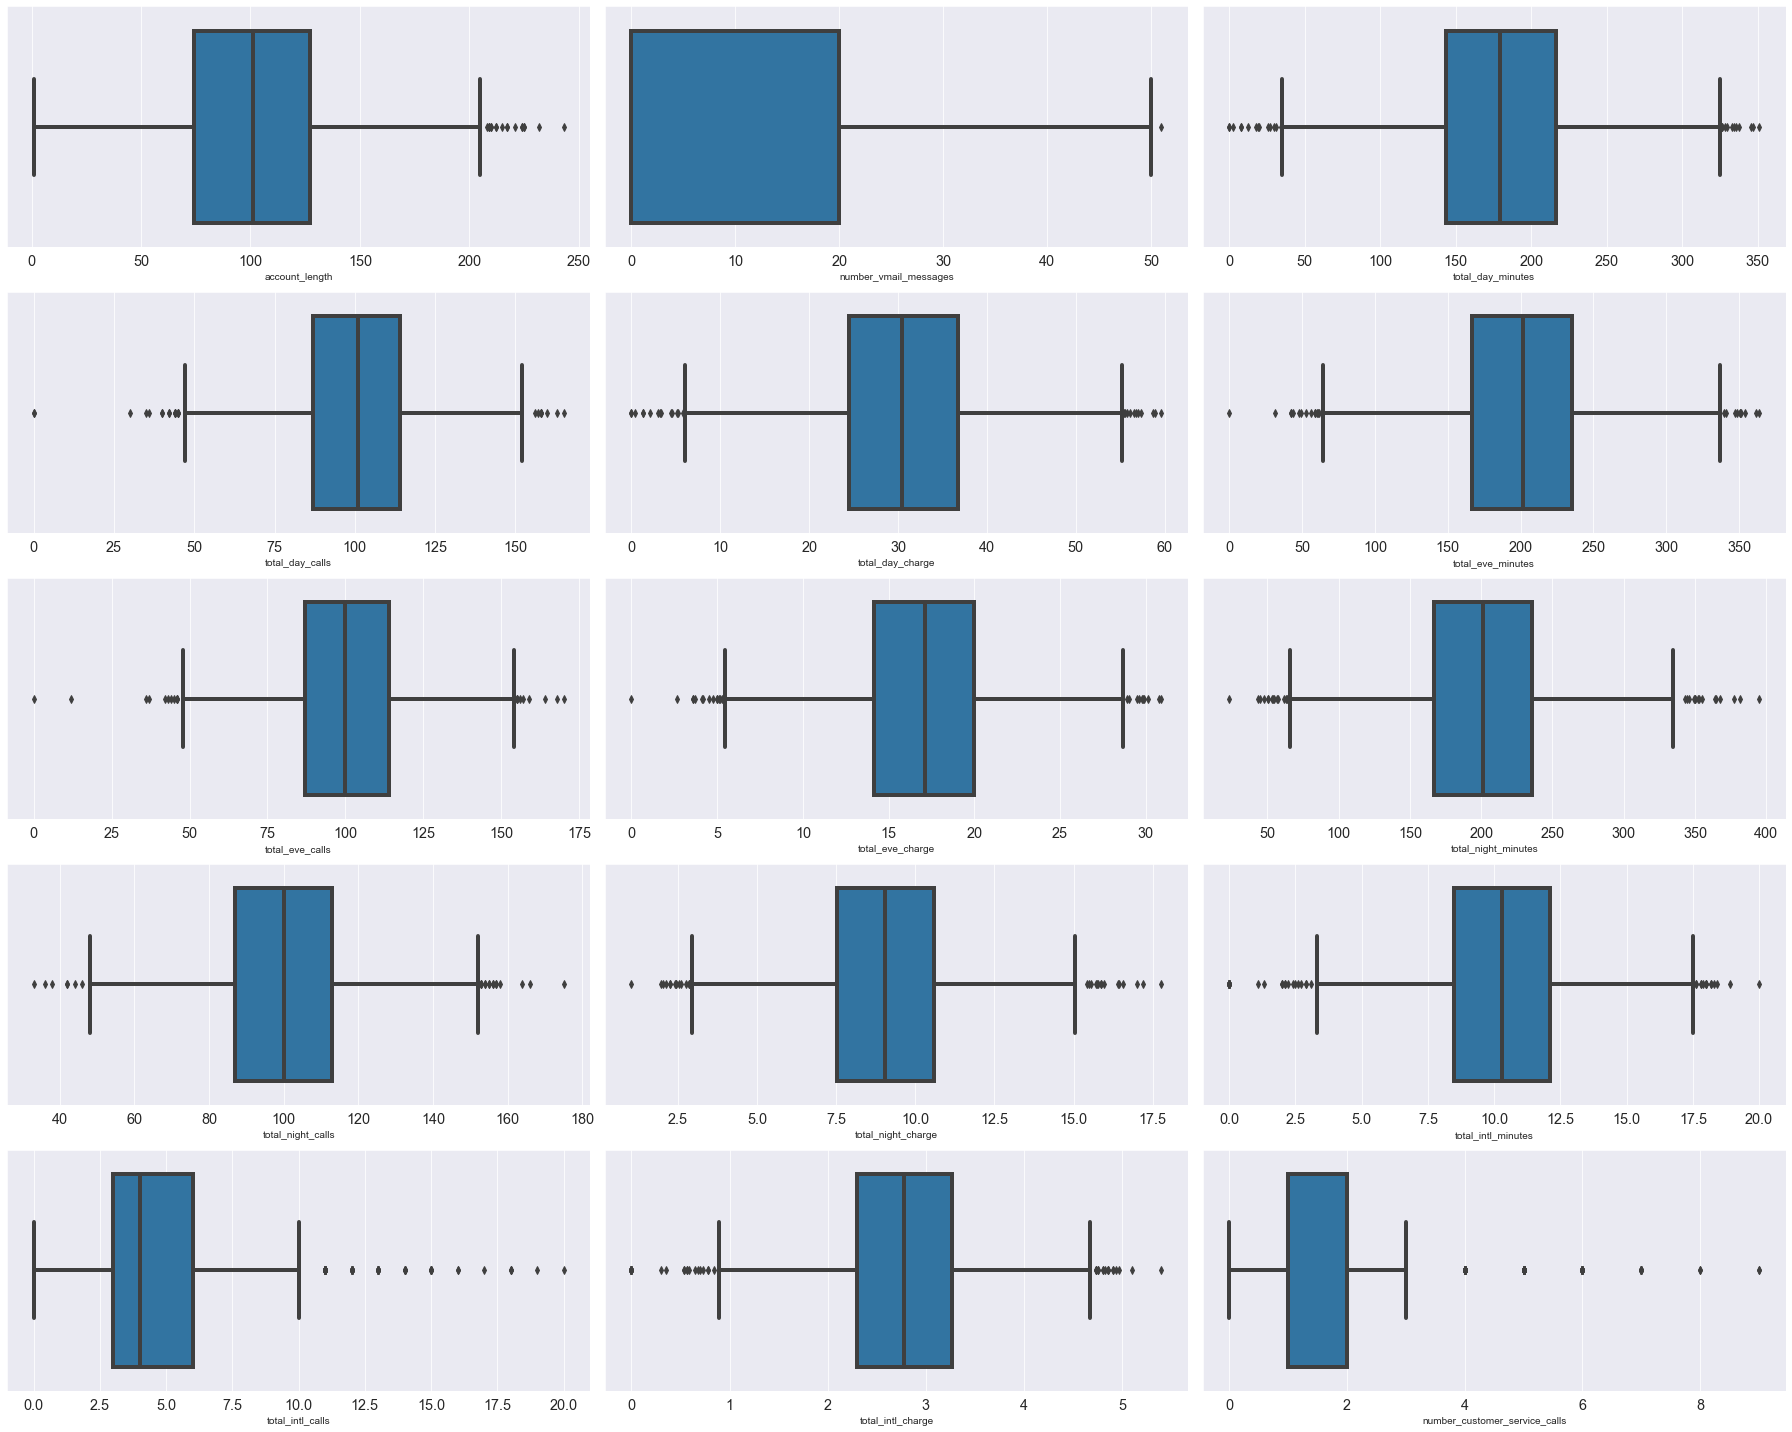

In [17]:
# Análise univariada das variáveis numéricas // Univariate analysis of numerical variables

# Funçõo para geração de boxplot
def plot_boxplot(df, features_list:list, qtd_subplots:int=3, orient:str='h'):
    """
    Função para análise univariada das variáveis numéricas utilizando gráficos boxplots da biblioteca Seaborn.
    Function for univariate analysis of numerical variables using boxplot plots from the Seaborn library.
    """
    plt.figure(figsize = (25, 20))
    for i in range(0, len(features_list)):
        plt.subplot(qtd_subplots, int(len(features_list)/5), i + 1)
        chart = sns.boxplot(x = df[features_list[i]], orient = orient)
        plt.tight_layout()
    
    return chart

# Chamada à função para geração de boxplots
plot_boxplot(df=df, features_list=num_features,qtd_subplots=5);

In [18]:
num_features

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

**Algumas observações:**

1. Os boxplots das variáveis number_vmail_messages e number_customer_service_calls demonstram distribuições não simétricas e a presença de outliers acima do terceiro quartil.

2. As demais variáveis, embora um pouco mais simétricas, parecem ter um número maior de outliers, tanto acima do terceiro quartil como abaixo do primeiro quartil.

---
_**Some observations:**_

1. _The boxplots of the variables number_vmail_messages and number_customer_service_calls demonstrate non-symmetric distributions and the presence of outliers above the third quartile._

2. _The other variables, although a little more symmetrical, seem to have a greater number of outliers, both above the third quartile and below the first quartile._


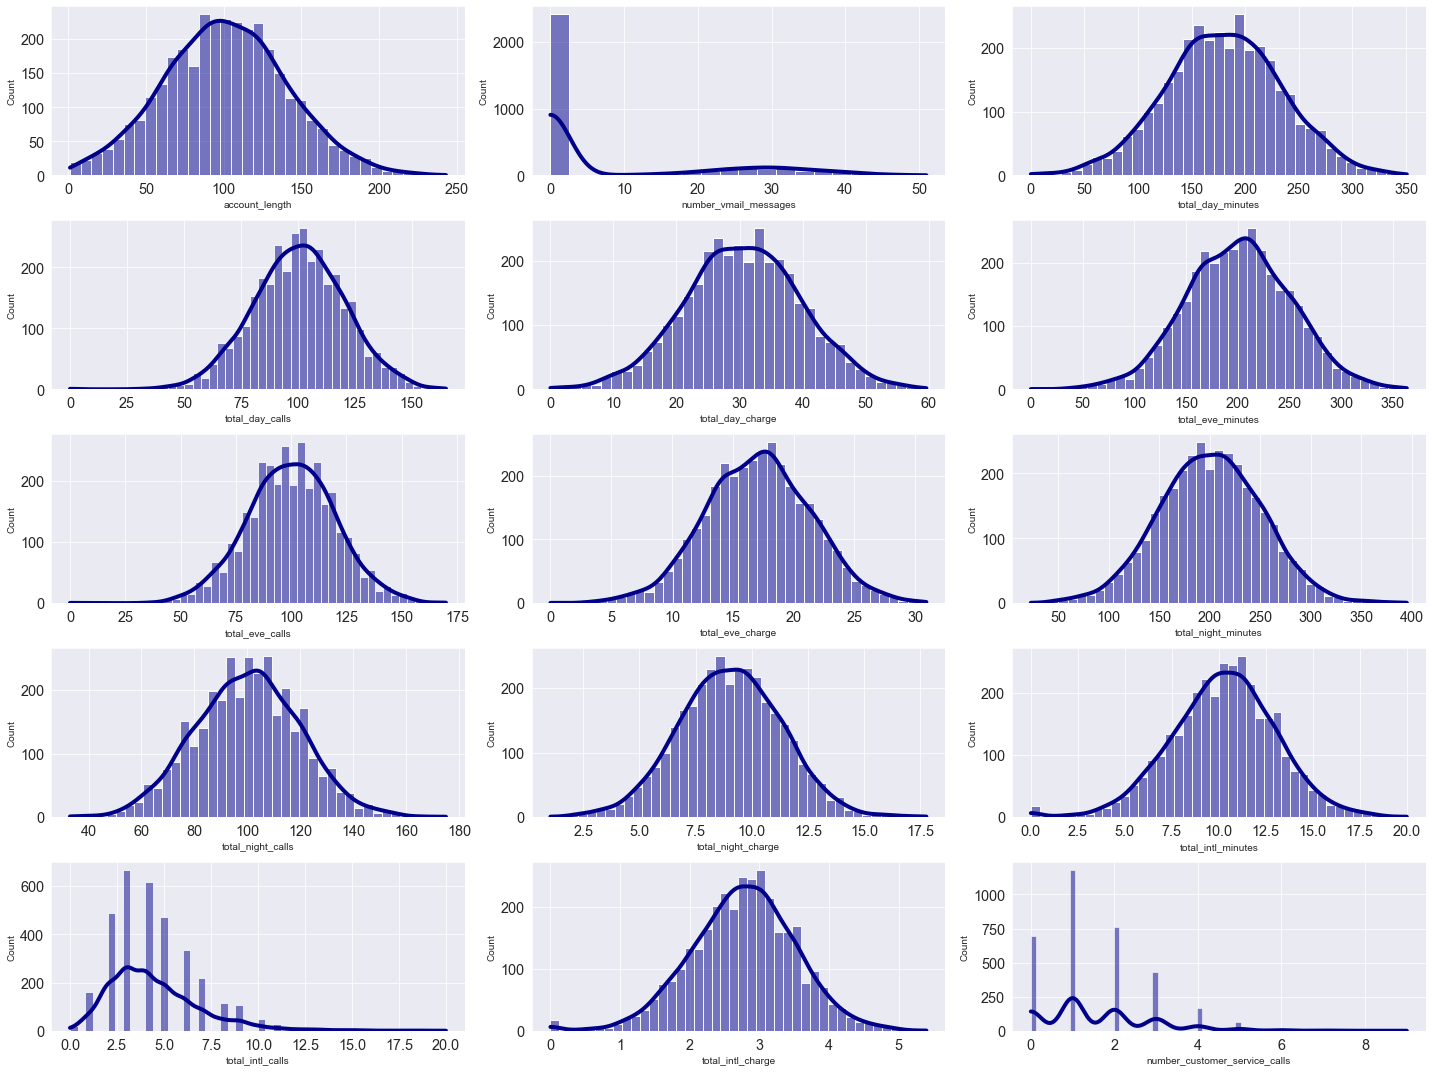

In [19]:
# Análise univariada das variáveis numéricas // Univariate analysis of numerical variables

# Funçõo para geração de distplot
def plot_distplot(df, features_list:list, qtd_subplots:int=3, color:str='darkblue', orient:str='v'):
    """
    Função para análise univariada das variáveis numéricas utilizando gráficos distplots da biblioteca Seaborn.
    Function for univariate analysis of numerical variables using distplot plots from the Seaborn library.
    """
    plt.figure(figsize = (20, 15))
    for i in range(0, len(features_list)):
        plt.subplot(qtd_subplots, int(len(features_list)/qtd_subplots), i+1)
        chart = sns.histplot(x = df[features_list[i]], kde = True, color = color)
        plt.xlabel(features_list[i])
        plt.tight_layout()
    
    return chart

# Chamada à função
plot_distplot(df=df, features_list=num_features,qtd_subplots=5);

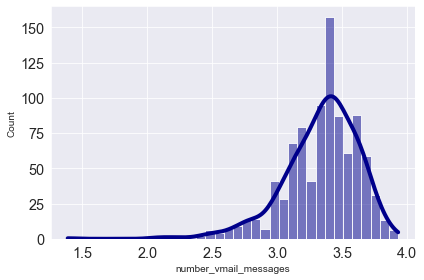

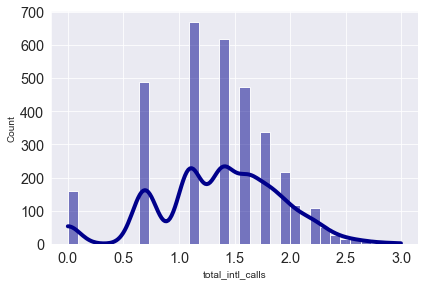

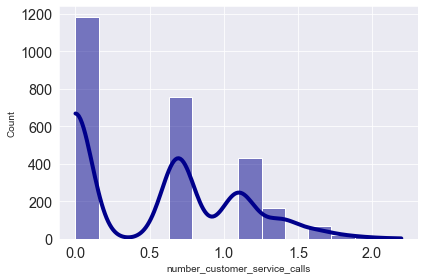

In [20]:
# Aprofundamento da análise das variáveis que apresentam distribuição não similar a normal

# Funçõo para geração de distplot com log da variável
def plot_distplot_log(df, features_list:list, qtd_subplots:int=3, color:str='darkblue', orient:str='v'):
    """
    Função para análise univariada das variáveis numéricas utilizando log e gráficos distplots da biblioteca Seaborn.
    Function for univariate analysis of numerical variables using log and distplot plots from the Seaborn library.
    """
    #plt.figure(figsize = (15,12))
    for i in range(0, len(features_list)):
        plt.figure(figsize = (6, 4))
        #plt.subplot(qtd_subplots, int(len(features_list)/qtd_subplots), i+1)
        chart = sns.histplot(x = np.log(df[features_list[i]]), kde = True, color = color)
        plt.xlabel(features_list[i])
        plt.tight_layout()
    
    return chart

# Chamada à função
issue_feat = ['number_vmail_messages', 'total_intl_calls', 'number_customer_service_calls']
plot_distplot_log(df=df, features_list=issue_feat,qtd_subplots=3);

**Algumas observações:**
1. Os distplots das variáveis sugerem que, em sua maioria, elas seguem uma distribuição normal, à exceção da distribuição do atributo total_intl_calls, que parece ser assimétrica, inclinada para a direita.
2. O displot da variável number_customer_service_calls sugere que tal atributo segue uma distribuição uniforme.
3. O displot com logaritmo dos valores da variável number_vmail_messages sugere que, para valores acima de cerca de 2.5, essa variável segue uma distribuição normal.

---
_**Some observations:**_
1. _The distplots of the variables suggest that, for the most part, they follow a normal distribution, with the exception of the total_intl_calls attribute which appears to be skewed to the right._
2. _The displot of the variable number_customer_service_calls suggest that such attribute follows a uniform distribution._
3. _The displot with logarithm of the values of the variable number_vmail_messages suggests that, for values above 2.5, it follows a normal distribution._
 
#### REVER: ideal é fazer o teste estatístico para testar a normalidade de cada distribuição

In [21]:
# Assimetria (Skewness)

# A direção da assimetria é dada pelo sinal. Um zero significa nenhuma assimetria.
# Um valor negativo significa que a distribuição é negativamente assimétrica. Um valor possitivo, que é positivamente
# assimétrica.

# O coeficiente compara a distribuição da amostra com uma distribuição normal: quanto maior o valor, mais a distribuição
# difere de uma distribuição normal.


In [22]:
# Curtose (Kurtosis)

# Utilizado para medir o grau de achatamento ou curtose de uma distribuição, calculado a partir do intervalo interquartil
# dos percentis de ordem 10 e 90.

# Mesocúrtica: k = 0,263; Platicúrtica: k > 0,263; Leptocúrtica: k < 0,263


In [23]:
# Medidas de Forma da Distribuição // Distribuition shape measures

# Cálculo das medidas
skewness = {}
kurtosis = {}
for feat in num_features:
    skewness.update({feat: df[feat].skew()})
    kurtosis.update({feat: df[feat].kurtosis()})

# Dataframe com medidas de forma
df_sk = pd.Series(skewness).to_frame()
df_ku = pd.Series(kurtosis).to_frame().rename(columns={'0': 'kurtosis'})
df_sk_ku = pd.concat([df_sk, df_ku,], axis=1)
df_sk_ku = df_sk_ku.T
df_sk_ku.index = ['skewness', 'kurtosis']

# Consolidação com describe
df_stats = df.describe()
df_stats = pd.concat([df_stats, df_sk_ku], axis=0)
df_stats

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000
skewness,0.096606,1.264824,-0.029077,-0.111787,-0.029083,-0.023877,-0.055563,-0.023858,0.008921,0.032500,0.008886,-0.245136,1.321478,-0.245287,1.091359
kurtosis,-0.107836,-0.051129,-0.019940,0.243182,-0.019812,0.025630,0.206156,0.025487,0.085816,-0.072020,0.085663,0.609185,3.083589,0.609610,1.730914


**Algumas observações:**
1. O coeficiente de assimetria (Skewness) compara a distribuição da amostra com uma distribuição normal: quanto maior o valor, mais a distribuição difere de uma distribuição normal. No dataset em análise, os coeficientes das variáveis giram em torno de 0, à exceção das variáveis number_vmail_messages, total_int_calls e number_customer_service_calls, que apresentam skewness superior a 1. 

2. O coeficiente de curtose (Kurtosis), utilizado para medir o grau de achatamento de uma distribuição, é calculado a partir do intervalo interquartil dos percentis de ordem 10 e 90. No caso, as variáveis total_int_minutes, total_int_calls, total_int_charge and number_customer_service_calls apresentam coeficiente superior a 0.263, o que demonstra distribuções platicúrticas.

---

_**Some observations:**_

1. _The skewness coefficient compares the sample distribution with a normal distribution: the higher the value, the more the distribution differs from a normal distribution. In the dataset under analysis, the coefficient of the variables is around 0, with the exception of the variables number_vmail_messages, total_int_calls and number_customer_service_calls, which have skewness greater than 1._

2. _The kurtosis coefficient, used to measure the degree of flattening of a distribution, calculated from the interquartile range of the 10th and 90th percentiles. In this case, the variables total_int_minutes, total_int_calls, total_int_charge and number_customer_service_calls have a coefficient greater than 0.263, which demonstrates platykurtic distributions._



### Exploração das Variáveis Categóricas // _Exploration of Categorical Variables_

In [24]:
# Resumo das variáveis categóricas // Summary of categorical variables
df[cat_features].describe()

,state,area_code,international_plan,voice_mail_plan
count,3333,3333,3333,3333
unique,51,3,2,2
top,WV,area_code_415,no,no
freq,106,1655,3010,2411


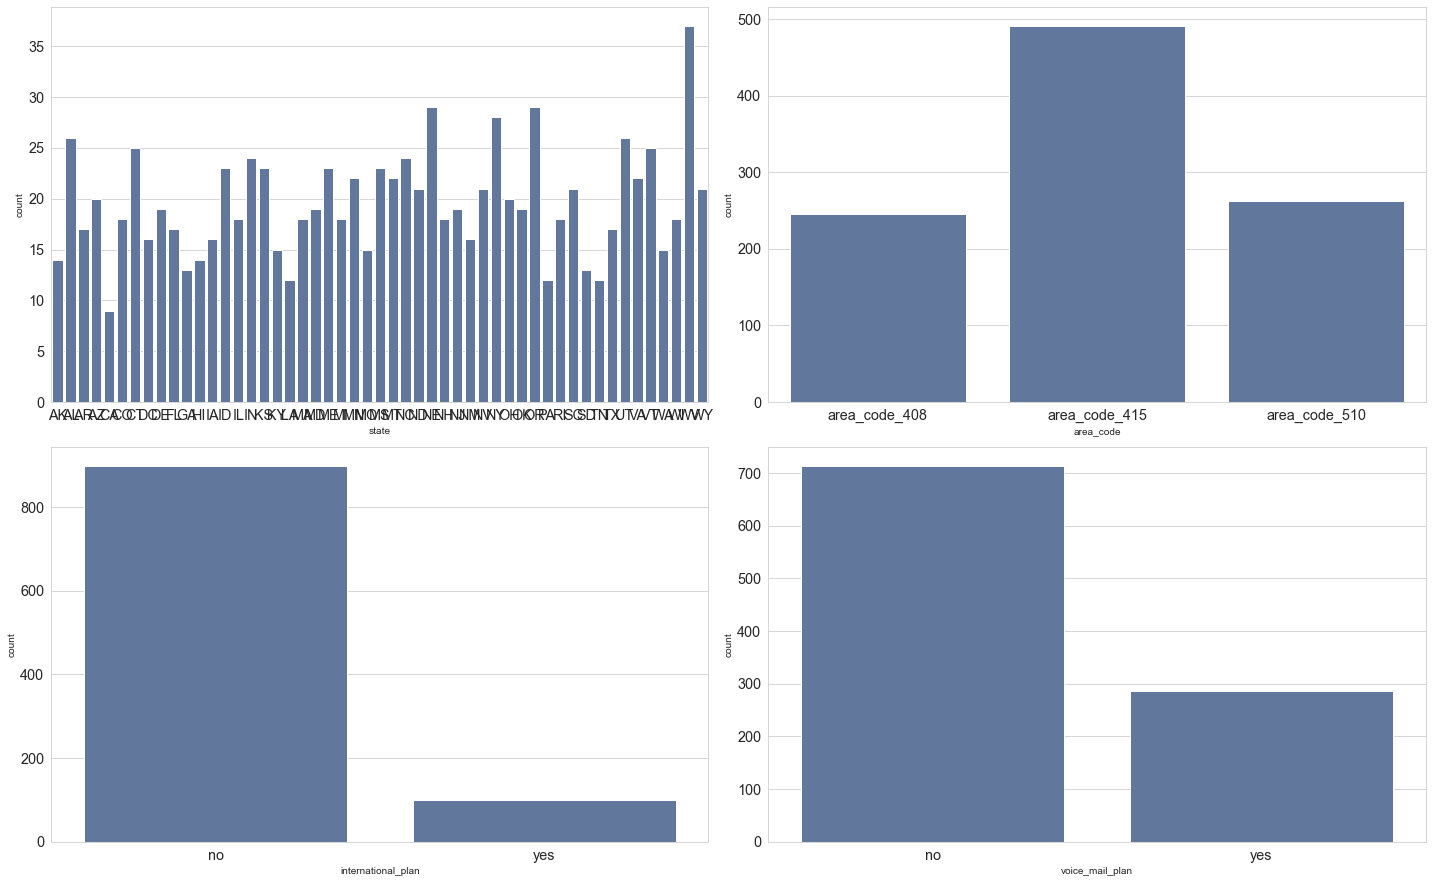

In [25]:
# Análise univariada das variáveis categóricas // Univariate analysis of categorical variables

sns.set_style('whitegrid')
df_sample = df.sample(1000, random_state = 42) 

for i in range(0, len(cat_features)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x = df_sample[cat_features[i]], color = '#5975a5', orient = 'v')
    plt.tight_layout()

**A partir dos gráficos pode-se observar que:**

1. Existe uma grande variedade nas quantidades de consumidores por estado.
2. O código de área predominante é 415.
3. Poucos consumidores contrataram plano para ligações internacionais.
4. As colunas international_plan e voice_mail_plan são binárias, motivo pelo qual não há necessidade de se analisar com profundidade a forma da distribuição.
---
_**From the graphs it can be seen that:**_

1. _There is a wide variety in the number of consumers by state._
2. _The predominant area code is 415._
3. _Few consumers have contracted a plan for international calls._
4. _The international_plan and voice_mail_plan columns are binary, so there is no need to deeply analyze the form of the distribution._


### Exploração da Variável-alvo // _Exploration of Target Variable_

Churn no: 2850
Churn yes: 483


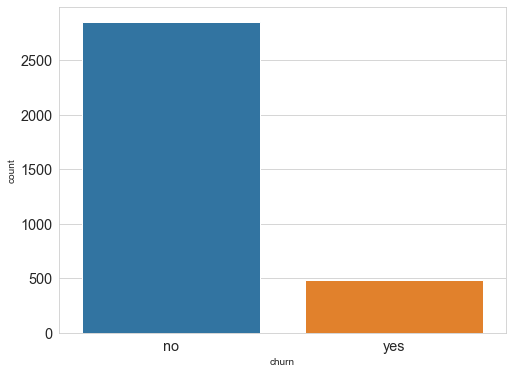

In [26]:
# Análise da variável target // Target Variable Analysis

# Plot
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = 'churn', label = 'Count')

# Value counts
df['churn'].value_counts()           
no, yes = df['churn'].value_counts() 

# Print
print(f'Churn no: {no}')
print(f'Churn yes: {yes}')

_**Observação:**_
As classes da variável target estão desbalanceadas.
---
_**Observation:**_
_The target variable classes are unbalanced._

### Análise Bivariada - Mapa de Correlação // _Bivariate Analysis - Correlation Map_

In [27]:
corr_df = df[num_features].corr()
corr_df

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
number_vmail_messages,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
total_day_minutes,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
total_day_calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
total_day_charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
total_eve_minutes,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
total_eve_calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
total_eve_charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
total_night_minutes,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288
total_night_calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802


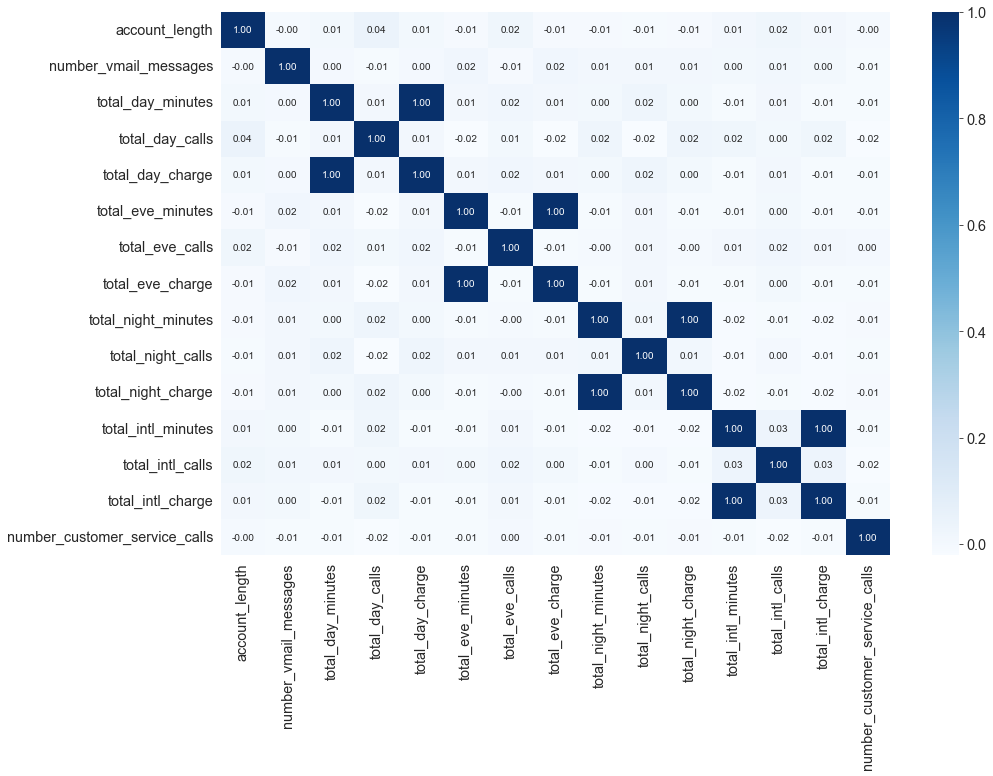

In [28]:
# Heatmap das correlações entre as variáveis numéricas

plt.figure(figsize = (15, 10))
sns.heatmap(corr_df, cmap = 'Blues', annot = True, fmt = '.2f');

**A partir do mapa de correlação acima, pode-se ver que:**
1. Existe uma correlação muito forte entre a variável total_day_minutes e total_day_charge (1), o que indica presença de multicolinearidade.

2. Essa mesma multicolinearidade ocorre entre as variáveis total_eve_minutes e total_eve_charge, total_night_minutes e total_night_charge, e total_intl_minutes e total_intl_charge.

3. Existe correlação fraca entre as demais variáveis.
---
_**Some observations:**_

1. _There is a very strong correlation between the variable total_day_minutes and total_day_charge (1), which indicates the presence of multicollinearity._

2. _This same multicollinearity occurs between the variables total_eve_minutes and total_eve_charge, total_night_minutes and total_night_charge, and total_intl_minutes and total_intl_charge._

3. _There is a weak correlation between the other variables._


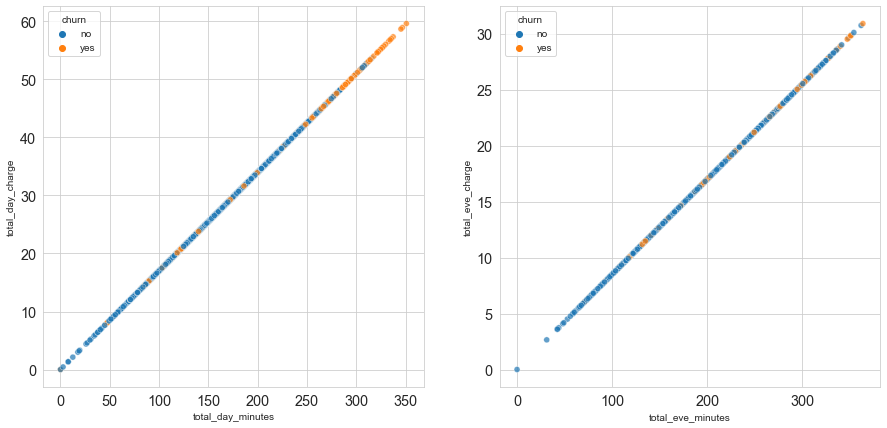

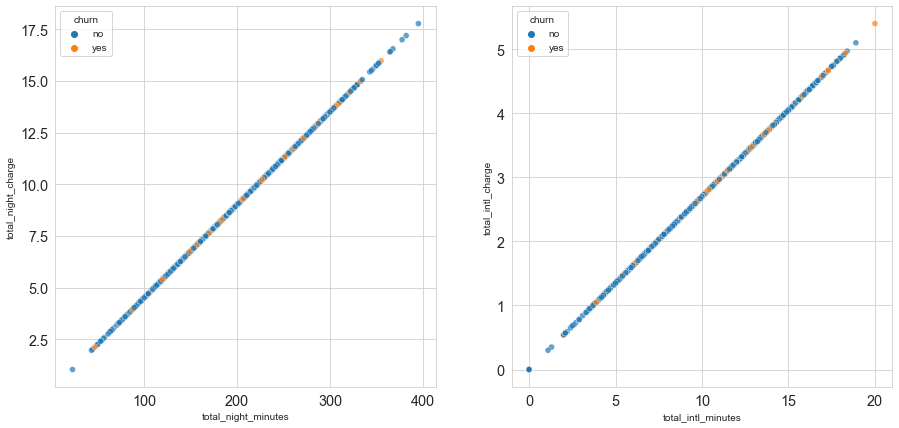

In [29]:
# Gráfico de Dispersão para confirmar a presença de multicolinearidade entre algumas variáveis

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.scatterplot(y='total_day_charge', x='total_day_minutes', data=df, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(y='total_eve_charge', x='total_eve_minutes', data=df, ax=axes[1], hue='churn', alpha=0.7)

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.scatterplot(y='total_night_charge', x='total_night_minutes', data=df, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(y='total_intl_charge', x='total_intl_minutes', data=df, ax=axes[1], hue='churn', alpha=0.7)
plt.show();

### Colunas Categóricas x Variável Target // _Categorical Columns x Target Variable_

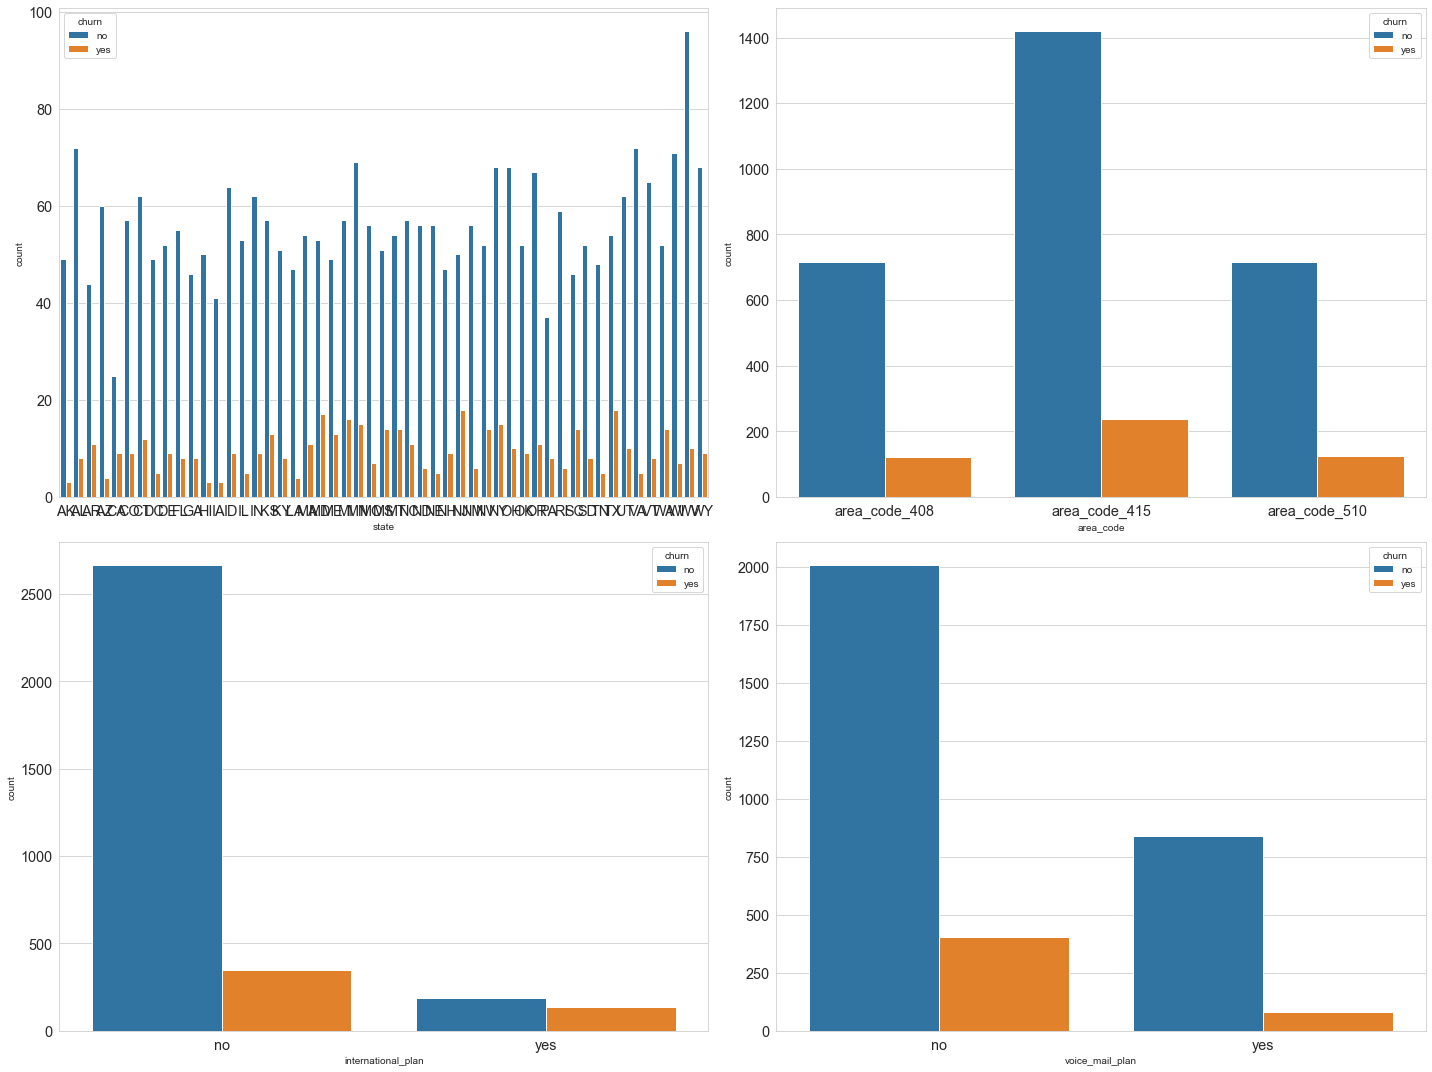

In [30]:
# Análise bivariada das variáveis categóricas // Bivariate analysis of categorical variables

def plot_countplot_subplot(df, target, features_list:list, qtd_subplots:int=3):
    """
    Função para análise bivariada de variáveis categóricas com gráficos de contagem da biblioteca Seaborn.
    Function for bivariate analysis of categorical variables with count graphs from the Seaborn library.
    """
    plt.figure(figsize = (20, 15))
    for i in range(0, len(features_list)):
        plt.subplot(qtd_subplots, int(len(features_list)/qtd_subplots), i+1)
        chart = sns.countplot(x = features_list[i], data=df, hue=target)
        plt.tight_layout()
    
    return chart

# Chamada à função

plot_countplot_subplot(df, 'churn', cat_features, 2);

_**Observação:**_
Todas as variáveis categóricas parecem ter algum impacto na variável target.
---
_**Observation:**_
_All categorical variables seem to have some impact on the target variable._